In [1]:
%matplotlib inline

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


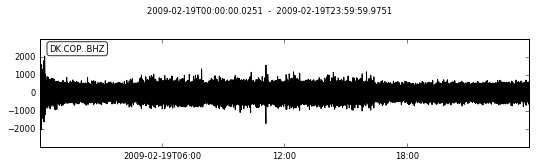

In [2]:
from obspy.core import read

singlechannel = read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(singlechannel)
singlechannel.plot()

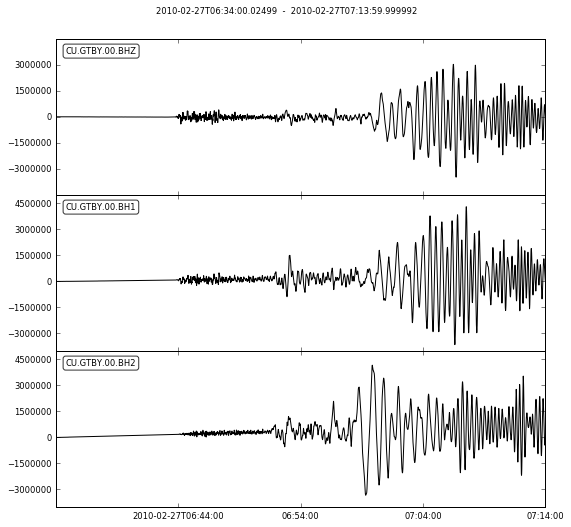

In [4]:
from obspy.clients.fdsn import Client

client = Client("IRIS")
from obspy import UTCDateTime
t = UTCDateTime("2010-02-27T06:34:00.000")
#t = UTCDateTime("2010-02-27T06:45:00.000")
tr = client.get_waveforms("CU", "GTBY", "00", "BH*", t, t + 40 * 60)
tr.detrend()
tr.plot()

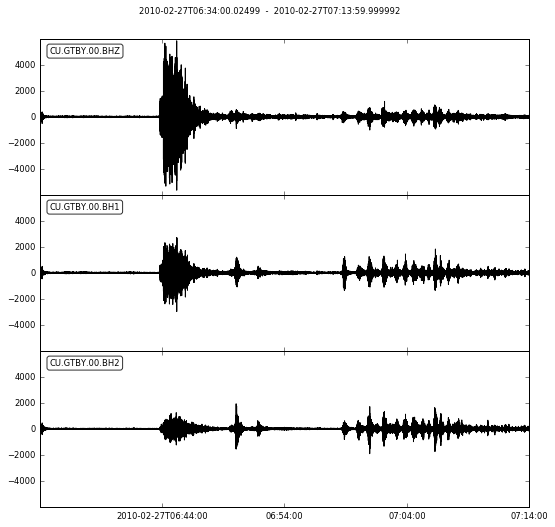

In [5]:
# apply band-pass filter
# ref: https://docs.obspy.org/tutorial/code_snippets/filtering_seismograms.html

import numpy as np
import matplotlib.pyplot as plt
import obspy

tr_filt = tr.copy()
#tr_filt.filter('highpass', freq=5.0, corners=2, zerophase=True)

tr_filt.filter("bandpass", freqmin=2, freqmax=8, corners=4, zerophase=True) 

#st_filt.filter('bandpass', freq=[2.0, 8.0], corners=2, zerophase=True)

tr_filt.plot()

# # Now let's plot the raw and filtered data...
# t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
# plt.subplot(211)
# plt.plot(t, tr.data, 'k')
# plt.ylabel('Raw Data')
# plt.subplot(212)
# plt.plot(t, tr_filt.data, 'k')
# plt.ylabel('Lowpassed Data')
# plt.xlabel('Time [s]')
# plt.suptitle(tr.stats.starttime)
# plt.show()

In [9]:
# This just lets the output of the following code samples
#  display inline on this page, at an appropriate size.
# ref: http://introtopython.org/visualization_earthquakes.html
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
 
plt.show()

ImportError: No module named 'mpl_toolkits.basemap'